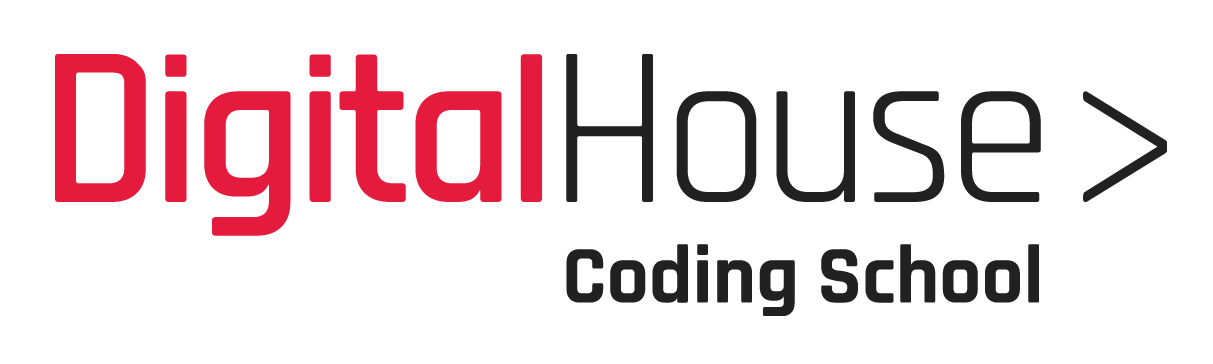

## Persistência de Modelos e Pipelines
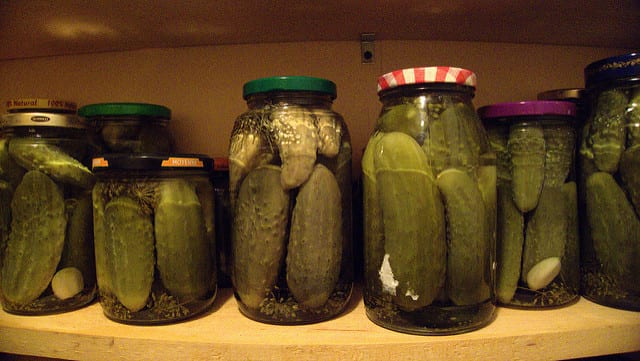


In [1]:
# import das bibliotecas que serão utilizadas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
# Carga dos dados do Iris DataSet
iris_df=load_iris()

In [3]:
# Dados carregados
iris_df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X_train,X_test,y_train,y_test=train_test_split(iris_df.data,iris_df.target,test_size=0.3,random_state=0)

## Criação Pipeline
### 1. Normalização dos dados usando o Standard Scaler
### 2. Redução de Dimensionalidade usando PCA
### 3. Applicação dos Modelos Preditivos

In [5]:
# Regressão Logística
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [6]:
# Árvore de Decisão
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [7]:
# Random Forest
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier(random_state=0))])

In [8]:
## Lista com os diferentes Pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [9]:
# inicialização dos dados
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [10]:
# Dicionário com os pipelines para facilitar o controle
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Execução do FIT - roda os pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [11]:
# resultados
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8666666666666667
Decision Tree Test Accuracy: 0.9111111111111111
RandomForest Test Accuracy: 0.9111111111111111


### Salvando o modelo com o Pickle - Logistic Regression

In [12]:
import pickle
arquivo = 'pipeline_lr.pkl'
pickle.dump(pipeline_lr, open(arquivo, 'wb'))

In [13]:
# load the model from disk
lr_pickle = pickle.load(open('pipeline_lr.pkl', 'rb'))

### Salvando o modelo com o joblib - Decision Tree

In [14]:
import joblib
from joblib import dump, load
dump(pipeline_dt, 'pipeline_dt.joblib') 

['pipeline_dt.joblib']

In [15]:
dt_joblib = joblib.load('pipeline_dt.joblib')

### Nova execução dos pipelines

In [16]:
## Lista agora com os Pipelines que foram salvados em disco
pipelines = [lr_pickle, dt_joblib, pipeline_randomforest]
# inicialização dos dados
best_accuracy=0.0
best_classifier=0
best_pipeline=""
# Dicionário com os pipelines para facilitar o controle
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Execução do FIT - roda os pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    # resultados
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8666666666666667
Decision Tree Test Accuracy: 0.9111111111111111
RandomForest Test Accuracy: 0.9111111111111111
